In [45]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import PillowWriter

In [46]:
def mod(x): # returns the modular of a vector
    return (np.dot(x,x))**(0.5)

# body 1
p1=np.random.rand(2)
m1=1
v1=np.array([0,0])

# body 2
p2=np.random.rand(2)
m2=1
v2=np.array([0,0])

# body 3
p3=np.random.rand(2)
m3=1
v3=np.array([0,0])

# G Const
G=1 #6.67430*(10**(-11))
# small timestep
dt=0.01

In [47]:
# managing collision (when two bodies touch each they make elastic collision)
# they touch each other when they are below the distance of 2 btw each other (1 is their radius)
def collision(x):
    global v1,v2,v3
    # a means v1 and v2
    # b means v1 and v3
    # c means v2 and v3
    if x == "a":
        v1=v1*(-1)
        v2=v2*(-1)   
    elif x == "b":
        v1=v1*(-1)
        v3=v3*(-1)
    else:
        v3=v3*(-1)
        v2=v2*(-1)

(-100.0, 100.0)

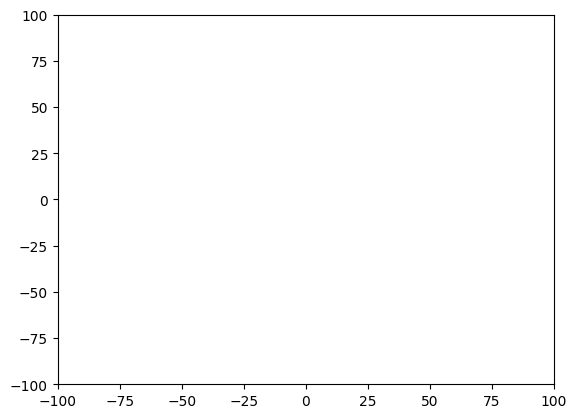

In [48]:
fig = plt.figure()
l,=plt.plot([],[])

plt.xlim(-100,100)
plt.ylim(-100,100)

In [ ]:
metadata = dict(title='Movie',artist='Limbo')
writer=PillowWriter(fps=5,metadata=metadata)

with writer.saving(fig,"body.gif",72):    
    for _ in range(3000):
        #plt.clf()
        ra=(p1-p2)*-1 # vector btw body 1 and body 2 
        rb=(p1-p3)*-1 # vector btw body 1 and body 3
        rc=(p2-p3)*-1 # vector btw body 2 and body 3

        #if mod(p1-p2) < 2 :
        #    collision("a")
        #elif mod(p1-p3) < 2 :
        #    collision("b")
        #elif mod(p3-p2) < 2 :
        #    collision("c")

        fa=(G*m1*m2*ra)/(mod(ra)**3) # force between body 1 and body 2
        fb=(G*m1*m3*rb)/(mod(rb)**3) # force between body 1 and body 3
        fc=(G*m3*m2*rc)/(mod(rc)**3) # force between body 2 and body 3
        
        # position and velocity updating
        
        # body 1
        p1 = p1+v1*dt+(((fa+fb)*(dt**2))/(2*m1))
        v1 = v1 + (((fa+fb)*dt)/m1)
    
        # body 2
        p2 = p2+v2*dt+(((fc-fa)*(dt**2))/(2*m2))
        v2 = v2 + (((fc-fa)*dt)/m2)
    
        # body 3
        p3 = p3+v3*dt+(((-fc-fb)*(dt**2))/(2*m3))
        v3 = v3 + (((-fc-fb)*dt)/m3)
    
        #plt.scatter([p1[0],p2[0],p3[0]],[p1[1],p2[1],p3[1]])
        x=[p1[0],p2[0],p3[0]]
        y=[p1[1],p2[1],p3[1]]

        l.set_data(x,y)

        writer.grab_frame()
    
    